# COĞRAFİ KODLAMA

## Kütüphaneleri Çağırma

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, MultiPoint, Polygon
import matplotlib.pyplot as plt

## Geopandas da mevcut olan veri çerçevesini çağırma

In [3]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

## İki veri setini yükleme ('naturalearth_cities', 'naturalearth_lowres')

In [4]:
sehir=gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
dünya=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

## dünya değişkenin tipini(type),boyut bilgisini(shape),ilk beş elemanını(head) öğrenme

In [5]:
#tip(type)
print(type(dünya))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [6]:
dünya.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [7]:
#177 satır 6 sütuna sahip
dünya.shape

(177, 6)

## sehir değişkenin tipini(type),boyut bilgisini(shape),ilk beş elemanını(head) öğrenme

In [48]:
#tip(type)
print(type(sehir))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [49]:
#202 satır,2 sütuna sahip
sehir.shape

(202, 2)

In [50]:
sehir.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


## Sütunların İsimlerini Değiştirme

In [9]:
dünya.rename(columns={'pop_est':'Nüfus',
                      'continent':'Kıta',
                      'name':'Ülkeler','gdp_md_es':'Alan'},inplace=True)
dünya.head(177)

,Nüfus,Kıta,Ülkeler,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## Nüfus Sütununa Ait İstatiksel Bilgileri Öğrenme

In [6]:
a=dünya["Nüfus"]
a.describe()


count    1.770000e+02
mean     4.171237e+07
std      1.459691e+08
min      1.400000e+02
25%      3.360148e+06
50%      9.961396e+06
75%      2.938430e+07
max      1.379303e+09
Name: Nüfus, dtype: float64

## Kıta başına ortalama nüfusu analiz edelim

In [11]:
ort_nüfus=dünya.groupby(['Kıta'])['Nüfus'].mean()#groupby:gruplama mean:ortolama alma
ort_nüfus.round().sort_values(ascending=False)#round:yuvarlama sort_values:değerleri sıralama
#ascending:True ise Veri çerçevesini artan sırada sıralayan Boolean değeri

Kıta
Asia                       93386061.0
South America              32195442.0
North America              31835673.0
Africa                     23905416.0
Europe                     19138422.0
Oceania                     5254692.0
Antarctica                     4050.0
Seven seas (open ocean)         140.0
Name: Nüfus, dtype: float64

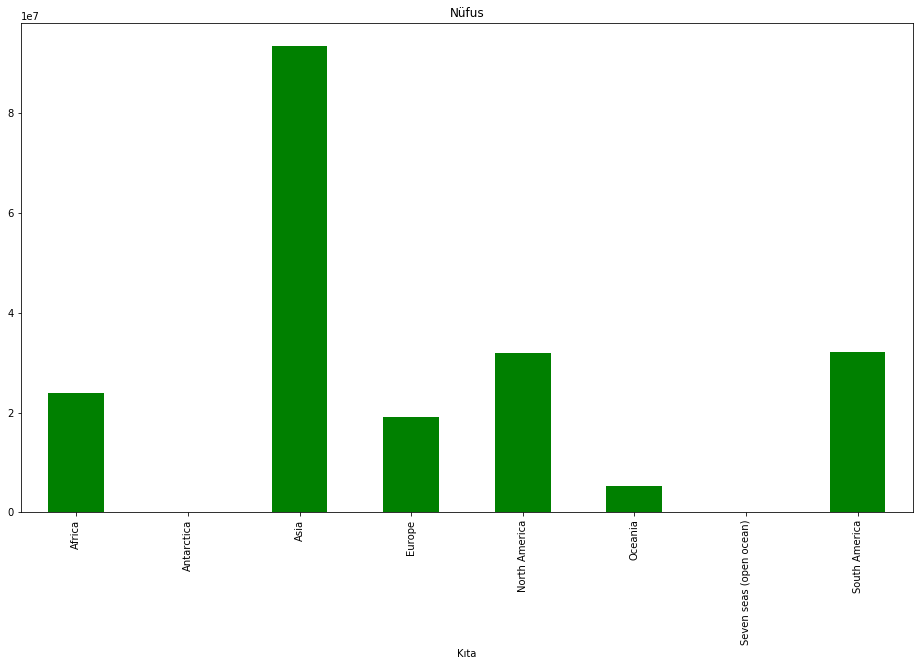

In [12]:
ort_nüfus.plot(kind='bar',title="Nüfus",color='green',figsize=(16,9));

## Kişi başına  GSYİH'y hesaplama

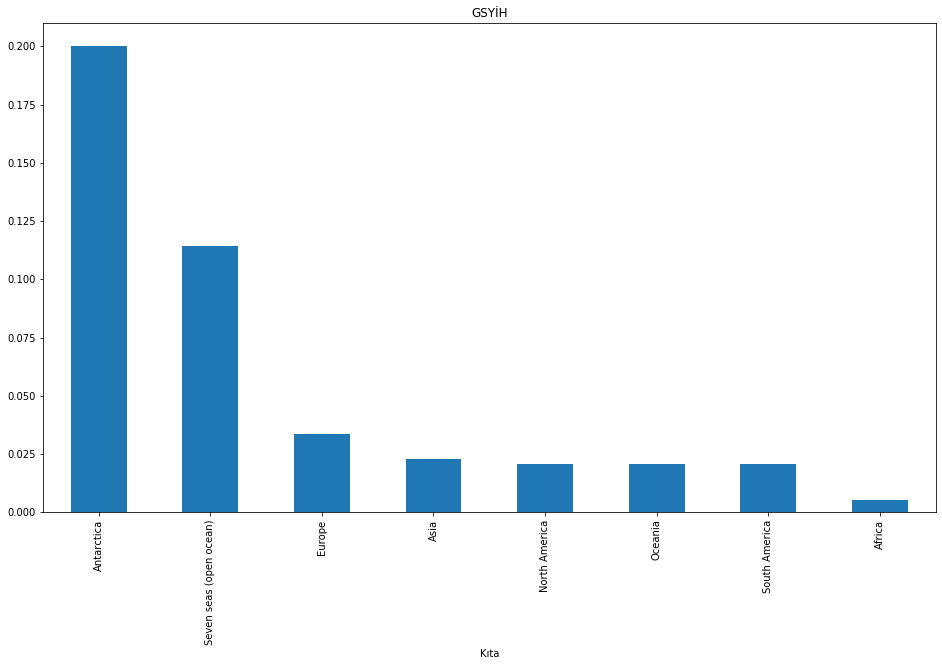

In [22]:
dünya['gsyih']=dünya["gdp_md_est"]/dünya["Nüfus"]
Gsyih=dünya.groupby(["Kıta"])["gsyih"].mean()
Gsyih=Gsyih.sort_values(ascending=False)
Gsyih.plot(kind='bar',title="GSYİH",figsize=(16,9));

## Kıtalardaki Ülke Sayısını Öğrenme

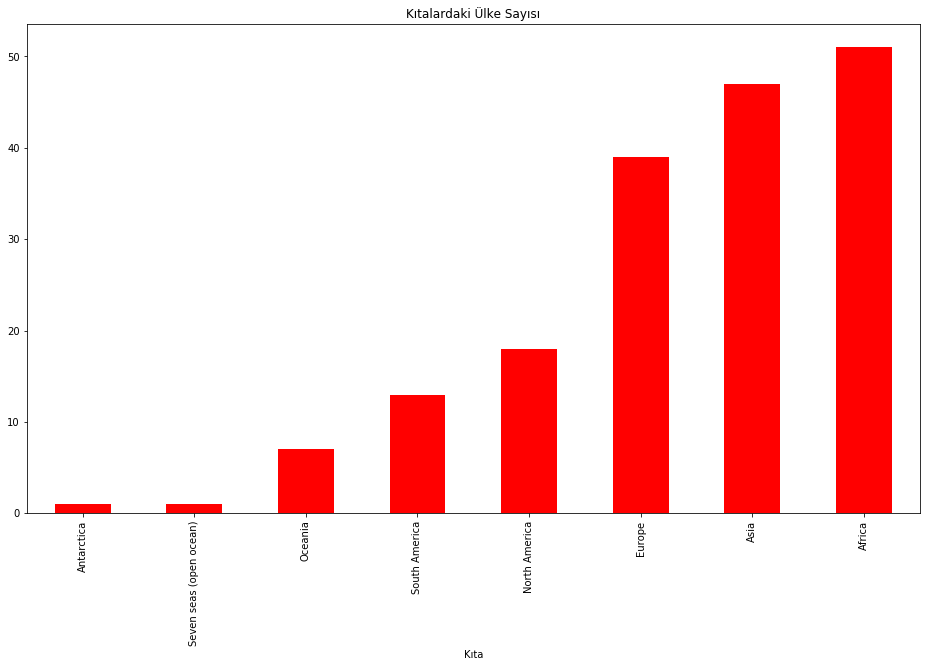

In [14]:
kıtaülke=dünya.groupby(["Kıta"])["Ülkeler"].count()
kıtaülke=kıtaülke.sort_values(ascending=True)
kıtaülke.plot(kind='bar',title='Kıtalardaki Ülke Sayısı',color='red',figsize=(16,9));                       

## Dünya Haritasını Çizdirme

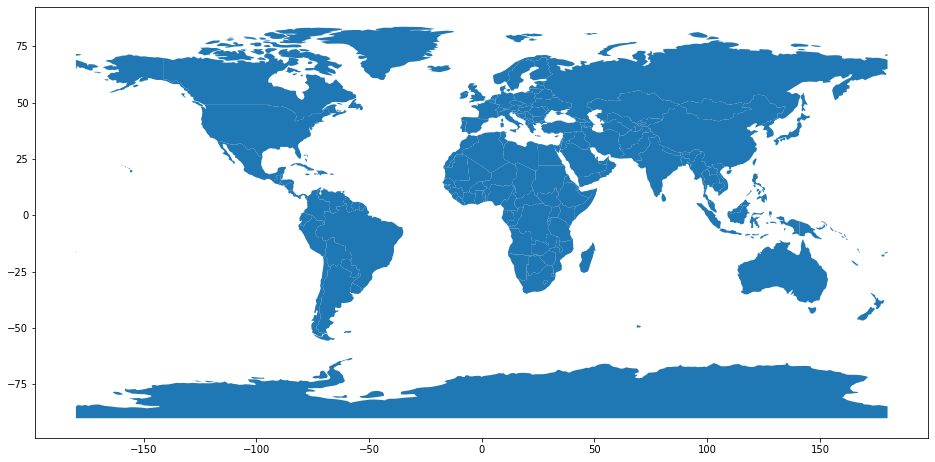

In [15]:
import geopandas as gpd
gdf_dünya=gpd.GeoDataFrame(dünya)
gdf_dünya.plot(figsize=(16,9));

## Asya Kıtasını Çizdirme

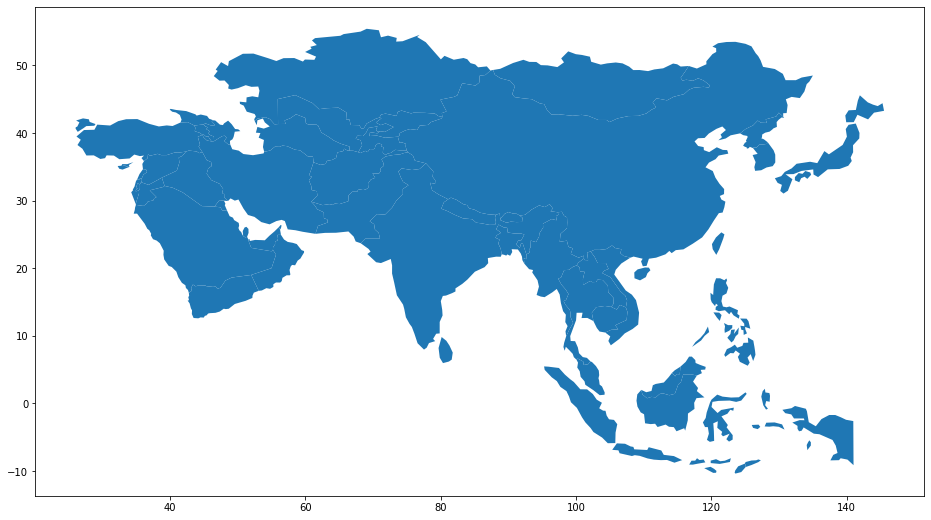

In [16]:
import geopandas as gpd
asya=dünya[dünya.Kıta=='Asia']#Asya kıtasını seçme
gdf_asya=gpd.GeoDataFrame(asya)
gdf_asya.plot(figsize=(16,9));

## Türkiye Haritasını Çizdirme

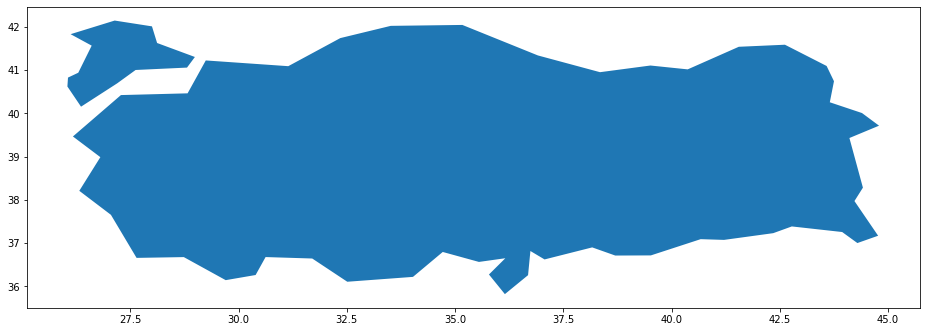

In [17]:
türkiye=dünya[dünya.Ülkeler==('Turkey')]
türkiye.plot(figsize=(16,9));

## Nüfus Bilgisini Gösteren Tematik Harita Yapımı

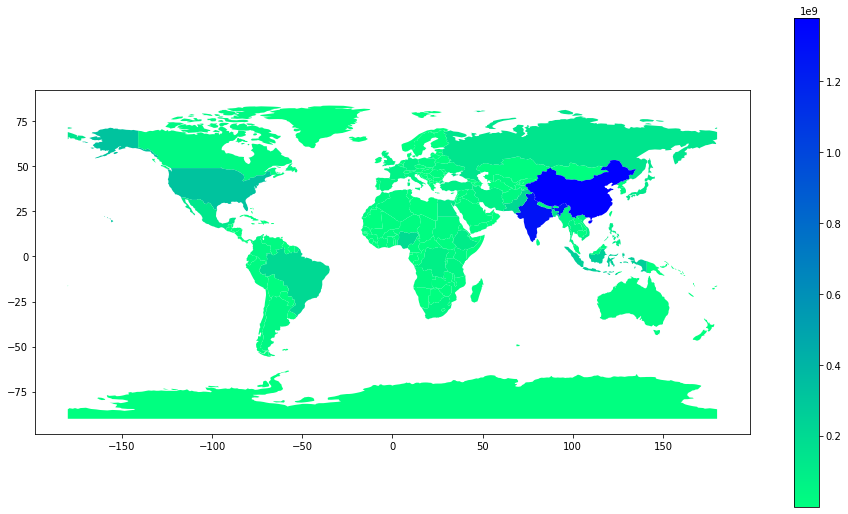

In [44]:
dünya.plot(column='Nüfus',
                   cmap='winter_r',
                   legend=True,
                   figsize=(16,9));